In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
reread = pd.read_hdf('./regelum_data/outputs/2024-04-01/19-13-03/0/.callbacks/HistoricalDataCallback/observations_actions_it_00050_ep_00003.h5')  

In [16]:
reread.iloc[:, 5:]

,delta_volume_0,delta_volume_1,delta_volume_2,delta_volume_3,drift_0,drift_1,drift_2,drift_3,volatility_0,volatility_1,...,corr_2_3,cash [USD],volume_0,volume_1,volume_2,volume_3,price_0 [USD],price_1 [USD],price_2 [USD],price_3 [USD]
0,0.083871,0.160630,-0.005286,0.278635,0.003549,0.022375,0.006216,0.041148,0.046955,-0.019304,...,0.020028,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.022481,0.157795,-0.069640,0.368845,0.011712,0.003812,-0.009724,0.031960,0.006948,-0.004238,...,-0.017161,0.482149,1.083871,1.160630,0.994714,1.278635,1.000194,1.001087,1.000343,1.002071
2,0.044025,0.088393,-0.039111,0.282357,0.015576,0.005859,0.049054,-0.030454,-0.016608,-0.036617,...,-0.039506,0.001753,1.106352,1.318426,0.925074,1.647480,1.000773,1.001277,0.999987,1.003675
3,0.185310,0.161064,0.017759,0.217738,-0.009446,-0.027466,-0.006527,-0.028036,-0.005322,-0.016767,...,0.034171,-0.375097,1.150376,1.406819,0.885963,1.929837,1.001582,1.001627,1.002440,1.002229
4,0.059639,0.105542,-0.002187,0.209697,0.035838,-0.048792,0.025206,-0.010123,0.028941,0.041811,...,0.021437,-0.958052,1.335686,1.567883,0.903723,2.147576,1.001122,1.000123,1.002140,1.000856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.080476,0.185688,0.007557,0.421002,0.021235,-0.025115,-0.022217,-0.032534,-0.019427,-0.000961,...,-0.036528,-79.073669,13.195256,22.116397,0.651415,46.575064,1.061313,1.051210,1.080750,1.035936
138,0.083066,0.123902,-0.062797,0.300687,-0.014306,0.028698,0.027613,0.016420,-0.032671,-0.003706,...,0.012785,-79.798574,13.275732,22.302085,0.658971,46.996066,1.062567,1.049889,1.079820,1.034440
139,0.146807,0.144403,0.033378,0.350042,-0.007721,-0.046719,-0.016396,0.025505,0.016201,-0.027242,...,-0.021984,-80.260154,13.358799,22.425986,0.596174,47.296753,1.061822,1.051384,1.080767,1.035023
140,0.044211,0.231737,-0.055922,0.314508,0.027714,-0.011244,-0.014183,0.000937,0.032480,0.033400,...,-0.048890,-80.966235,13.505606,22.570390,0.629553,47.646794,1.061415,1.048786,1.079862,1.036359


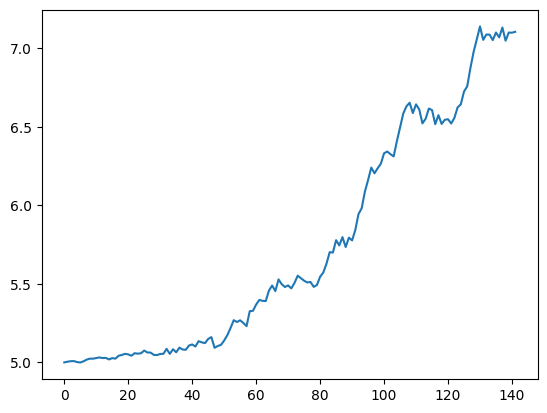

In [17]:
plt.plot(reread['price_0 [USD]']*reread['volume_0'] +
         reread['price_1 [USD]']*reread['volume_1']+
         reread['price_2 [USD]']*reread['volume_2']+
         reread['price_3 [USD]']*reread['volume_3']+
         reread['cash [USD]'])